In [1]:
from siphon.simplewebservice.wyoming import WyomingUpperAir
get_upper_air_data=WyomingUpperAir.request_data 
from metpy.units import units
import numpy as np

In [3]:
from datetime import datetime

In [3]:
dataset = get_upper_air_data(datetime(2013, 8, 25, 0), 'MFL')

In [4]:
### GRAB THE DATA and setup the units
p = dataset['pressure'].values*units.hPa
T = dataset['temperature'].values*units.degC
Td = dataset['dewpoint'].values*units.degC
Z = dataset['height'].values*units.meter
u = dataset['u_wind'].values*(units.meter/units.second)
v = dataset['v_wind'].values*(units.meter/units.second)

In [2]:
import mapes_utils
import importlib
importlib.reload(mapes_utils)

<module 'mapes_utils' from '/home/suvarchal/interactive_notebooks/mapes_utils.py'>

In [4]:
%matplotlib inline

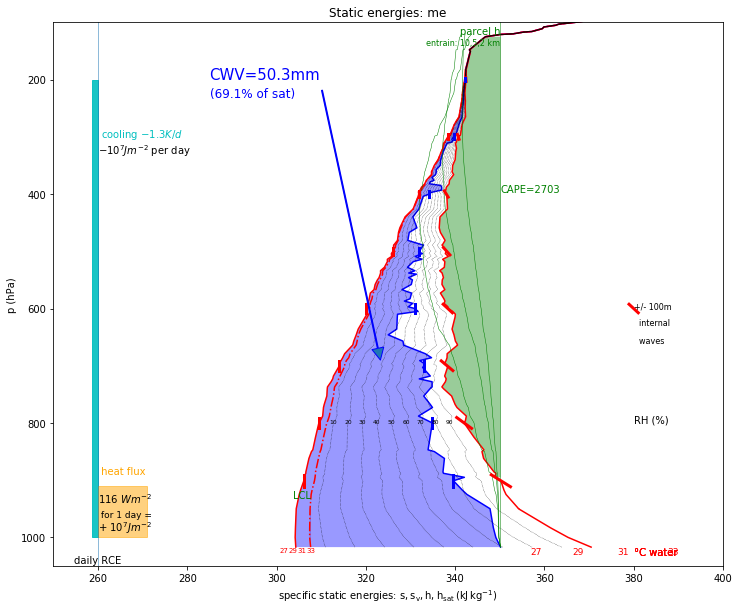

In [7]:
mapes_utils.EnergyMassPlot(p,T,Td,Z,u,v,label='me')

In [5]:
import xarray as xr

In [14]:
xr.open_dataset("https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das")

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [13]:
merra2=xr.open_mfdataset('https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das')

ValueError: cannot do wild-card matching for paths that are remote URLs: 'https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das'. Instead, supply paths as an explicit list of strings.

In [ ]:
merra2

In [10]:
T=merra2.t.isel(time=800).isel(lon=20,lat=180)
p=merra2.lev[~np.isnan(T)].values*units.hectopascal
rh=merra2.rh.isel(time=800).isel(lon=20,lat=180)
rh=rh[~np.isnan(T)].values

qv=merra2.qv.isel(time=800).isel(lon=20,lat=180)
qv=qv[~np.isnan(T)].values*(units.kilogram/units.kilogram)

Z=merra2.h.isel(time=800).isel(lon=20,lat=180)
Z=Z[~np.isnan(T)].values*units.meter
u=merra2.u.isel(time=800).isel(lon=20,lat=180)
u=u[~np.isnan(T)].values*(units.meter/units.second)
v=merra2.u.isel(time=800).isel(lon=20,lat=180)
v=v[~np.isnan(T)].values*(units.meter/units.second)

T=T[~np.isnan(T)].values
T=T*units.kelvin
import metpy.calc as mpcalc
from metpy.units import units
Td=mpcalc.dewpoint_rh(T,rh)




NameError: name 'merra2' is not defined

In [12]:
qv

<Quantity([1.6937103e-02 1.6659977e-02 1.6308414e-02 1.4796510e-02 1.2585375e-02
 1.0962776e-02 1.0199237e-02 1.0072564e-02 1.0034475e-02 9.9781975e-03
 9.6071782e-03 8.9831082e-03 8.8316025e-03 8.1141526e-03 6.4622574e-03
 4.7913129e-03 2.2468690e-03 1.3609155e-03 9.9852495e-04 6.9287483e-04
 5.5634283e-04 3.7133036e-04 9.6837510e-05 1.0501917e-05 1.7004839e-06
 2.0205132e-06 2.3684354e-06 2.5331051e-06 2.5889699e-06 2.5938516e-06
 2.7215788e-06 2.8860470e-06 3.0889450e-06 3.2619878e-06 3.4595496e-06
 3.7364139e-06 4.1049761e-06 4.2038055e-06 4.2686388e-06 4.2865477e-06
 4.2884340e-06 4.0845366e-06], 'dimensionless')>

In [13]:
np.warnings.filterwarnings('ignore')

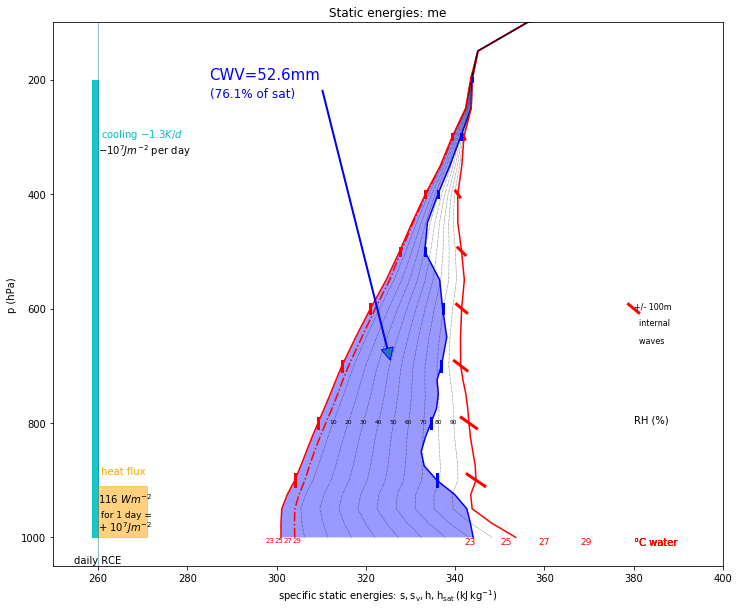

In [14]:
mapes_utils.EnergyMassPlot(p,T,Td,Z,u,v,sphum=qv,rh=rh,label='me')

In [15]:
import ipywidgets as widgets

import metpy.calc as mpcalc
from metpy.units import units

In [30]:
def energy_plot(time,lat,lon):
    loadingW.value="Loading...."
    ns = 1e-9 
    time_str=datetime.utcfromtimestamp(time.astype(int) * ns).strftime('%Y-%m-%d %H:%S')
    
    merra2_sel=merra2.sel(time=time,method='nearest').sel(lon=lon,lat=lat,method='nearest')
    
    T=merra2_sel.t
    
    p=merra2_sel.lev[~np.isnan(T)].values*units.hectopascal
    
    rh=merra2_sel.rh
    rh=rh[~np.isnan(T)].values

    qv=merra2_sel.qv
    qv=qv[~np.isnan(T)].values*(units.kilogram/units.kilogram)

    Z=merra2_sel.h
    Z=Z[~np.isnan(T)].values*units.meter
   
    u=merra2_sel.u
    u=u[~np.isnan(T)].values*(units.meter/units.second)
    v=merra2_sel.v
    v=v[~np.isnan(T)].values*(units.meter/units.second)

    T=T[~np.isnan(T)].values
    T=T*units.kelvin
    Td=mpcalc.dewpoint_rh(T,rh)
    label='Lat {} Lon {} Time {}'.format(format(lat,'.1f'),format(lon,'.1f'),time_str)
    mapes_utils.EnergyMassPlot(p,T,Td,Z,u,v,sphum=qv,rh=rh,label=label)
    txt="Lon: {} Lat: {} Time: {}".format(lon,lat,time_str)
    loadingW.value=txt
    
lonW=widgets.SelectionSlider(options=merra2.lon.values,description='Longitude',layout=widgets.Layout(width='50%'),continuous_update=False)
latW=widgets.SelectionSlider(options=merra2.lat.values,description='Latitude',layout=widgets.Layout(width='50%'),continuous_update=False)
timeW=widgets.SelectionSlider(options=merra2.time.values,description='Time',layout=widgets.Layout(width='90%'),continuous_update=False)
loadingW=widgets.Label('Loading....')
ui = widgets.VBox([timeW,widgets.HBox([latW,lonW]),loadingW])
out = widgets.interactive_output(energy_plot, {'time': timeW, 'lat': latW, 'lon': lonW})
out.layout.height='650px'
display(ui, out)

Output(layout=Layout(height='650px'))

In [31]:
out

Output(layout=Layout(height='650px'))

In [18]:
omega=merra2.isel(time=0).sel(lev=500, method='nearest')

In [19]:
import geoviews as gv
import holoviews as hv
from holoviews import streams


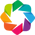

In [20]:
hv.notebook_extension('bokeh')

In [21]:

img=hv.Image(omega,kdims=['lon','lat'],vdims=['omega'])
tap_sel=streams.DoubleTap(source=img)


In [22]:
%%opts Image [tools=['tap']]
img

:Image   [lon,lat]   (omega)

In [23]:
tap_sel

DoubleTap(x=None,y=None)

In [24]:
wx=widgets.FloatSlider()

In [25]:
def sub(x,y):
    wx.value=x
    print(x,y)

In [26]:
tap_sel.add_subscriber(sub)

In [27]:
wx

FloatSlider(value=0.0)

In [28]:
import ipywidgets as widgets

In [29]:
sel.contents

NameError: name 'sel' is not defined

In [ ]:
wx

In [ ]:
img.columns()

In [2]:
import holoviews as hv


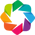

In [3]:
hv.notebook_extension('bokeh')

In [67]:
%%opts RGB [show_frame=False sizing_mode='fixed' xaxis=None yaxis=None border=0 width=500 height=333 lod={'factor':0,'threshold':1099}] 
hv.RGB.load_image('nxm.png')

:RGB   [x,y]   (R,G,B,A)

In [28]:
500*12/18

333.3333333333333

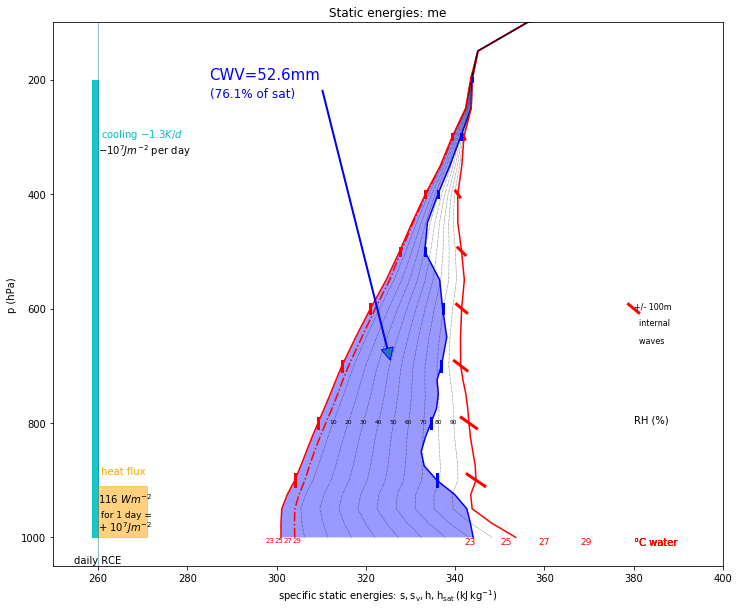

In [21]:
from IPython.display import Image
Image('nxm.png')

In [11]:
hv.help(hv.RGB)

RGB

Online example: http://holoviews.org/reference/elements/bokeh/RGB.html

-------------
Style Options
-------------

	<No style options available>

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RGBPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges                          True                       Boolean        (0, 1)     V RW  
bgcolor                               None                      Parameter                V RW AN 
border                                 10                         Number                   V RW  
clipping_colors                        {}                       

In [35]:

from os.path import dirname, join

from bokeh.models.glyphs import ImageURL
from bokeh.models import ColumnDataSource, Range1d, Plot, LinearAxis, Grid
from bokeh.io import curdoc
from bokeh.models.widgets import Panel, Tabs, Paragraph

url = './nxm.png'

source = ColumnDataSource(dict(url = [url]))

xdr = Range1d(start=0, end=1)
ydr = Range1d(start=0, end=1)

plot = Plot(title="ImageURL", x_range=xdr, y_range=ydr)

image1 = ImageURL(url="url", x=0, y=1, w=1, h=1, anchor="center", global_alpha=0.2)
plot.add_glyph(source, image1)

xaxis = LinearAxis()
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
plot.add_layout(yaxis,'left')

plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

#p1 = VBox(Paragraph(width=50), plot, width=800, height=600)

#tab1 = Panel(child=p1, title='tab1')

#tabs = Tabs(tabs=[tab1])

#curdoc().add_root(tabs)

ValueError: expected an instance of type Title, got ImageURL of type str

In [32]:
from bokeh.models.widgets import VBox

ImportError: cannot import name 'VBox'

In [60]:
i=ImageURL(url='http://bokeh.pydata.org/en/latest/_static/images/logo.png')

In [41]:
from bokeh.plotting import show,output_notebook,Figure

In [45]:
f=Figure()

In [42]:
output_notebook()

Loading BokehJS ...

In [57]:
show(f.image_url(url=['/home/suvarchal/interactive_notebooks/nxm.png'],x=0,y=10,w=200,h=200))

In [62]:
show(i)

In [58]:
show(f)

ERROR:/home/suvarchal/miniconda3/lib/python3.6/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: nxm.png [renderer: GlyphRenderer(id='d15daf2f-7e10-4642-99c7-e8c295ac1224', ...)]
ERROR:/home/suvarchal/miniconda3/lib/python3.6/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: nxm.png [renderer: GlyphRenderer(id='fc8663c8-7e2e-4aeb-bcbd-6e985ed42cbc', ...)]
